In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(label)
    return np.array(images), np.array(labels), class_names

In [12]:
X_train, y_train, class_names = load_images_from_folder('/content/drive/My Drive/Dataset/Animals')

170


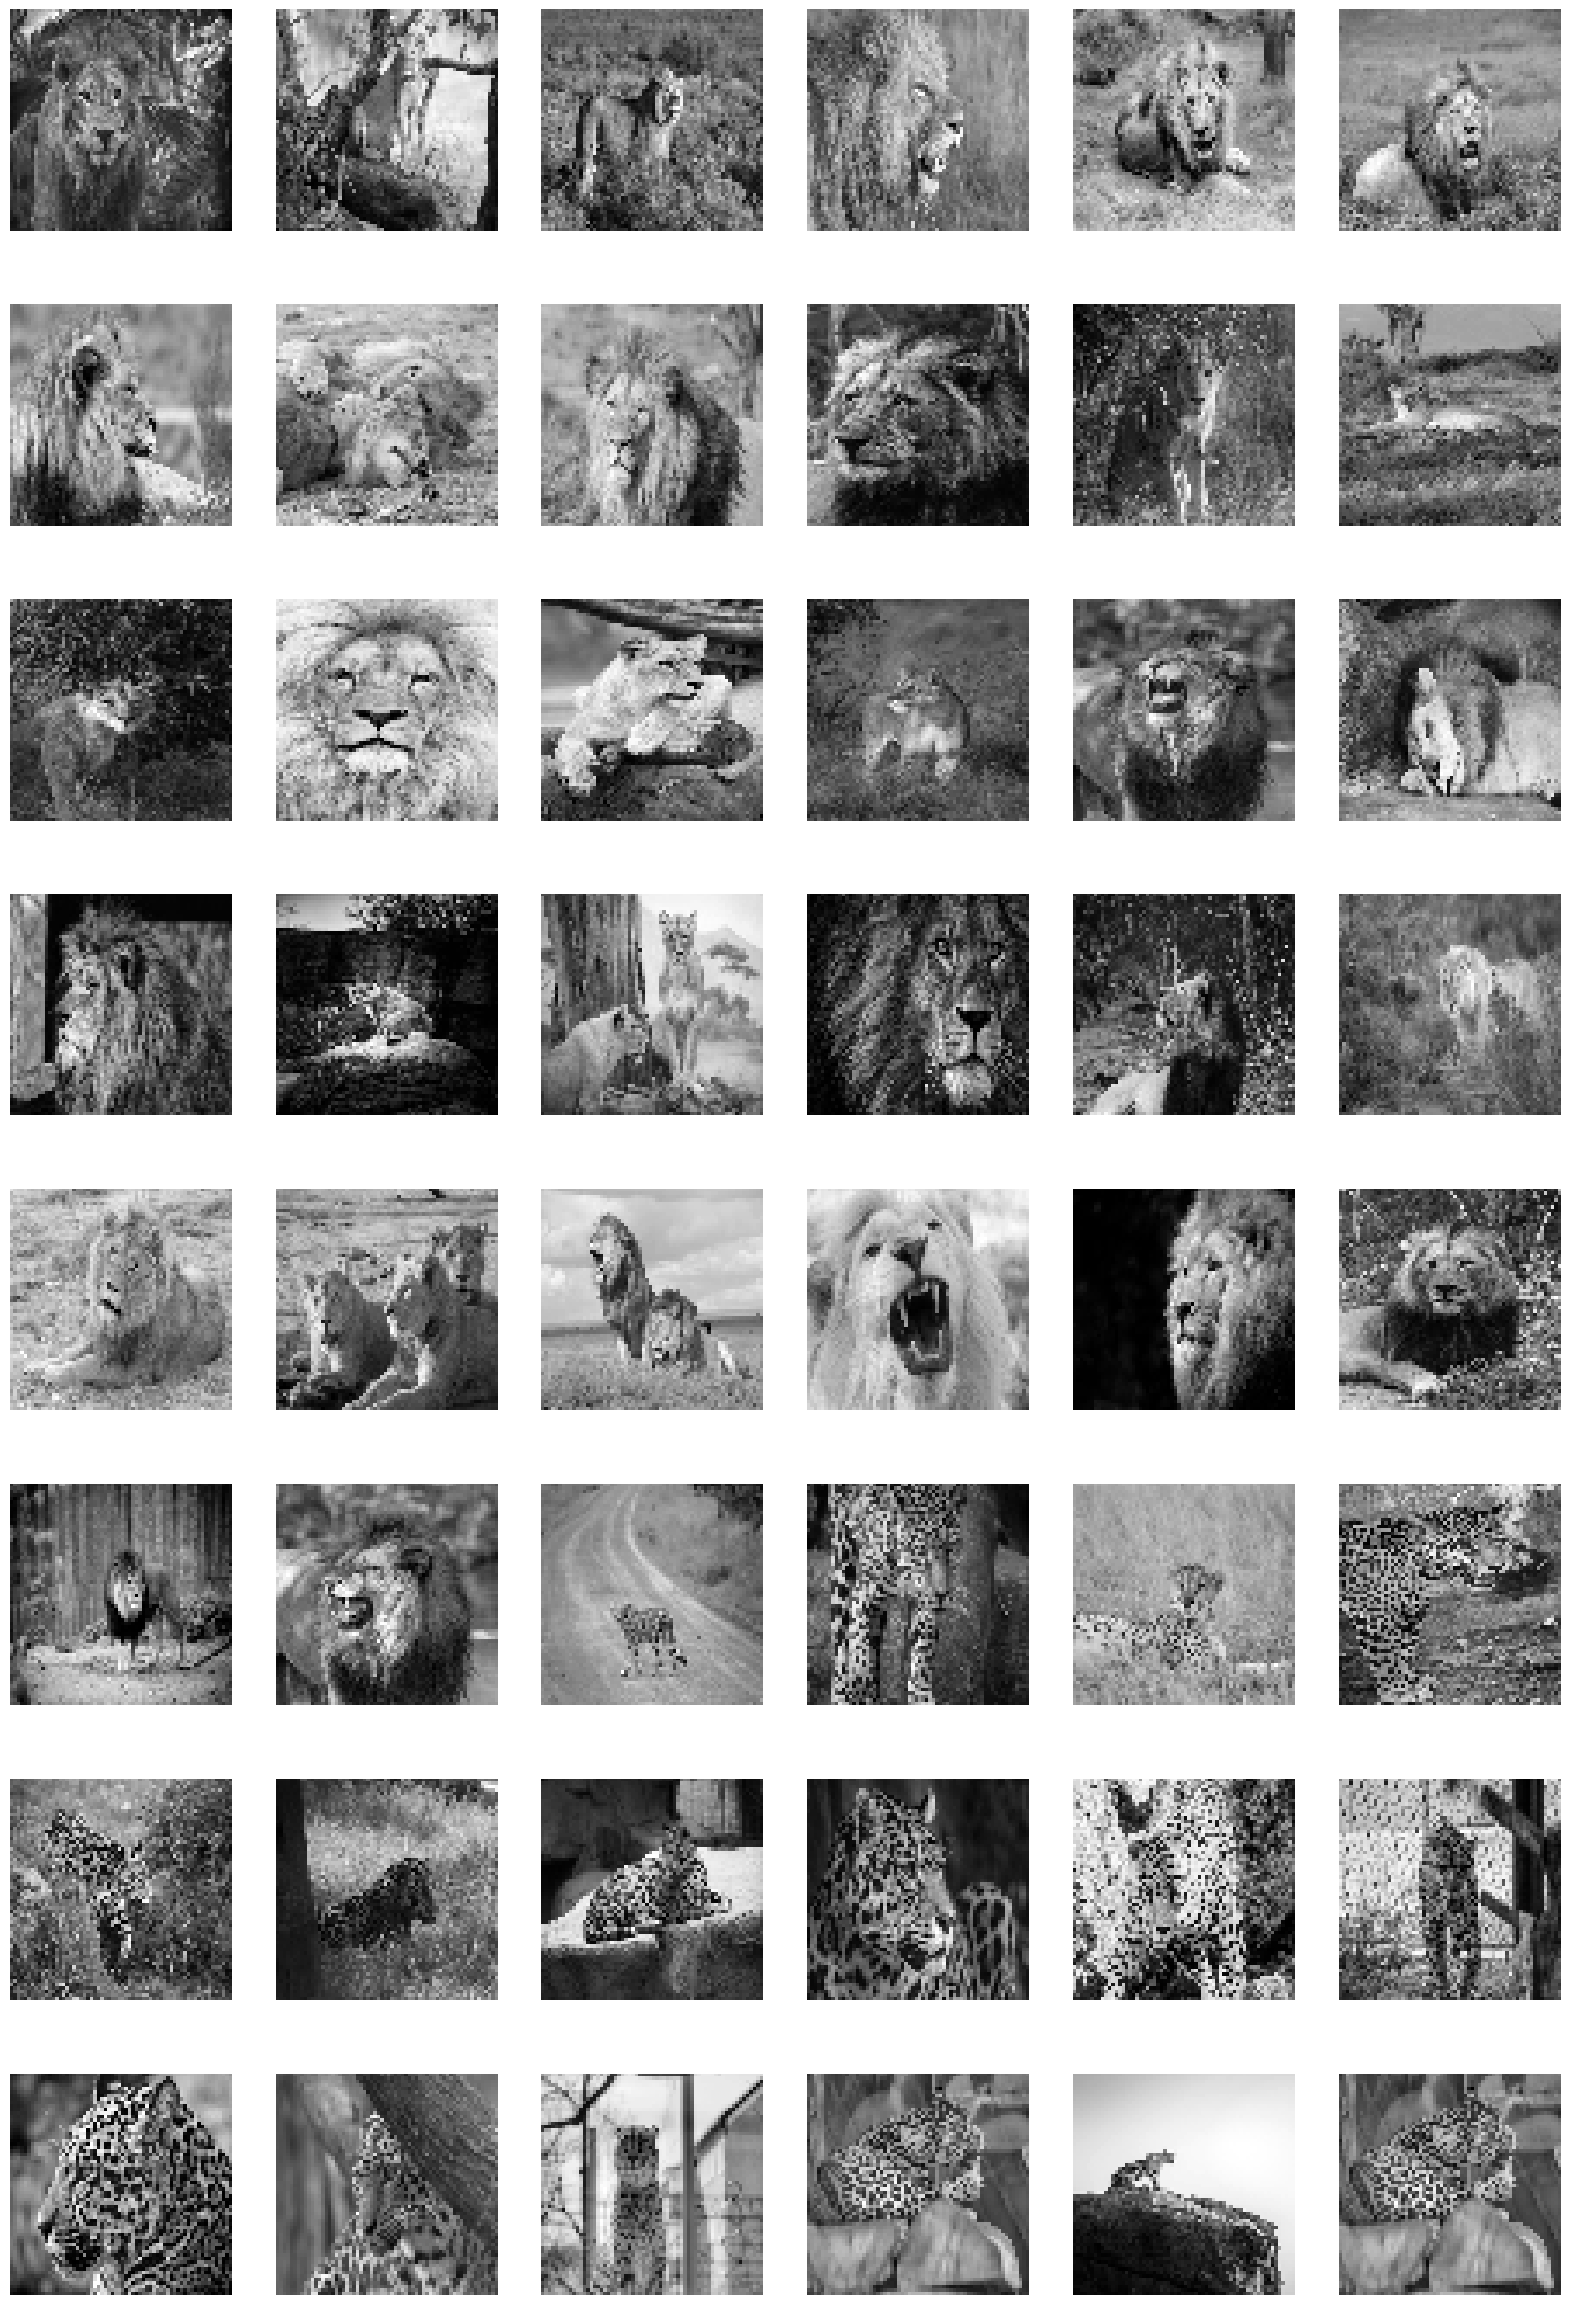

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(len(X_train))
plt.figure(figsize=(20, 30))

for i in range(48):
    plt.subplot(8, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(64, 64), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [4]:
def knn_predict(test_sample, train_data, train_labels, k):
    distances = [euclidean_distance(test_sample, x) for x in train_data]
    k_neighbors = np.argsort(distances)[:k]
    k_neighbor_labels = [train_labels[i] for i in k_neighbors]
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]

In [5]:
def manual_kfold_split(X, y, k_folds):
    data_size = len(X)
    indices = np.arange(data_size)
    np.random.shuffle(indices)
    fold_size = data_size // k_folds
    folds = []
    for i in range(k_folds):
        start = i * fold_size
        end = start + fold_size if i != k_folds - 1 else data_size
        val_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        folds.append((train_indices, val_indices))
    return folds

In [6]:
def knn_cross_validation(X, y, k_values, k_folds=5):
    folds = manual_kfold_split(X, y, k_folds)
    avg_accuracies = []
    for k in k_values:
        fold_accuracies = []
        for train_indices, val_indices in folds:
            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
            correct_predictions = 0
            for i, test_sample in enumerate(X_val):
                prediction = knn_predict(test_sample, X_train, y_train, k)
                if prediction == y_val[i]:
                    correct_predictions += 1
            fold_accuracy = correct_predictions / len(y_val)
            fold_accuracies.append(fold_accuracy)
        avg_accuracy = np.mean(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
    return avg_accuracies

In [7]:
X, y, class_names = load_images_from_folder(folder_path)

In [8]:
k_values = range(1, 31)
accuracies = knn_cross_validation(X, y, k_values)

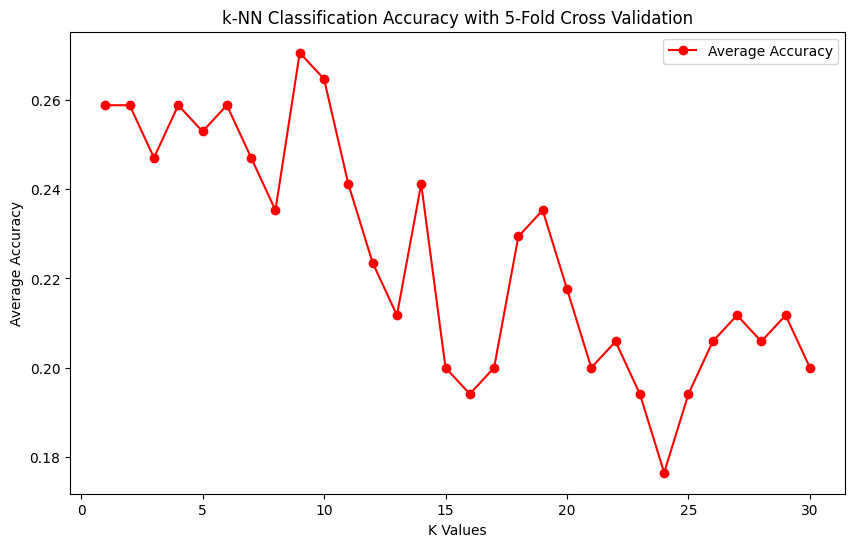

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r', label="Average Accuracy")
plt.xlabel('K Values')
plt.ylabel('Average Accuracy')
plt.title('k-NN Classification Accuracy with 5-Fold Cross Validation')
plt.legend()
plt.show()